In [1]:
print("Importing packages")
from pycbc import distributions
from pycbc.waveform import get_td_waveform, td_approximants
from pycbc.detector import Detector
import matplotlib.pyplot as plt
import numpy as np
import gwpy
import pylab
from tqdm.notebook import tqdm
from gwpy.timeseries import TimeSeries
import pandas as pd
import os
import csv
print("Packages Imported")

Importing packages
Packages Imported


In [2]:

print("Generated Binary Mass Distributions for BBH")
# We can make pairs of distributions together, instead of apart.
bbh_two_mass_distributions = distributions.Uniform(mass1=(10, 50),
                                               mass2=(10, 50))

bbh_two_mass_samples = bbh_two_mass_distributions.rvs(size=5000)

Generated Binary Mass Distributions for BBH


In [3]:
from pycbc import frame
#import random-
#from numpy import random
print("Using Binary Mass Distributions to generate BBH waveforms")
print("Generating BBH Waveforms, Noise and Merging them together and writing into disk, it may take few minutes...")
for i in tqdm(range(len(bbh_two_mass_samples))):
    hp, hc = get_td_waveform(approximant="SEOBNRv2",                                # what are hp and hc?
                         mass1=bbh_two_mass_samples[i][0],
                         mass2=bbh_two_mass_samples[i][1],
                         delta_t=1.0/4096,
                         f_lower=40)                                                # change to 40 Hz

    noise = TimeSeries(np.random.normal(scale=.1, size=16384), sample_rate=4096)    # did not understand clearly    
    noise= noise*1e-18
    st = np.random.randint(0,2)
    #st = round(st,0)
    #hp.save("bbh_template_4k/bbh_4k_"+str(i+1)+".txt")
    #frame.write_frame("bbh_template_4k/bbh_4k_"+str(i+1)+".gwf", , hp)
    #pylab.plot(hp.sample_times, hp, label='H1')
    #pylab.plot(noise)
    signal = TimeSeries.from_pycbc(hp)
    
    signal.write("/home/hrishi/SOP/Gravitational Wave Detection Using Deep Learning/raw_data_files/bbh_signal/bbh_4k_"+str(i)+".txt")
    noise.write("/home/hrishi/SOP/Gravitational Wave Detection Using Deep Learning/raw_data_files/noise_templates/noise_4k_"+str(i)+".txt")
    #print(st)
    
    signal.t0 = st
    data = noise.inject(signal)
    #pylab.plot(data)
    data.write("/home/hrishi/SOP/Gravitational Wave Detection Using Deep Learning/raw_data_files/merged_bbh_noise_signal/merged_noise_signal_"+str(i)+".txt")

#pylab.ylabel('Strain')
#pylab.xlabel('Time (s)')
#pylab.legend()
#pylab.show()

Using Binary Mass Distributions to generate BBH waveforms
Generating BBH Waveforms, Noise and Merging them together and writing into disk, it may take few minutes...


  0%|          | 0/5000 [00:00<?, ?it/s]

In [ ]:
# MERGING NOISE + SIgnal Templates into single file


#for i in tqdm(range(5)):
path = "/home/hrishi/SOP/Gravitational Wave Detection Using Deep Learning/raw_data_files/merged_bbh_noise_signal/"
files= os.listdir(path)
f = open('/home/hrishi/SOP/Gravitational Wave Detection Using Deep Learning/raw_data_files/Final_BBH_Merged_Noise_Signal_Reduced_No_ABS.csv', 'w')
cw = csv.writer(f)

for i in tqdm(files):
    df = pd.read_csv(path+i,sep = ' ', header=None)
    c = df[:][1]
    cw.writerow(c)
f.close()

In [5]:
# MERGING NOISE Templates into single file

path_1 = "/home/hrishi/SOP/Gravitational Wave Detection Using Deep Learning/raw_data_files/noise_templates/"
files_1= os.listdir(path_1)
f1 = open('/home/hrishi/SOP/Gravitational Wave Detection Using Deep Learning/raw_data_files/Final_Merged_Noise_Reduced_No_Abs.csv', 'w')
cw_1 = csv.writer(f1)

for i in tqdm(files_1):
    #print(files)
    df = pd.read_csv(path_1+i,sep = ' ', header=None)
    c = df[:][1]
    cw_1.writerow(c)
f1.close()

  0%|          | 0/5000 [00:00<?, ?it/s]

In [6]:
# MERGING SIGNAL Templates into single file

path_1 = "/home/hrishi/SOP/Gravitational Wave Detection Using Deep Learning/raw_data_files/bbh_signal/"
files_1= os.listdir(path_1)
f1 = open('/home/hrishi/SOP/Gravitational Wave Detection Using Deep Learning/raw_data_files/Final_Merged_bbh_Signal_Reduced_No_Abs.csv', 'w')
cw_1 = csv.writer(f1)

for i in tqdm(files_1):
    #print(files)
    df = pd.read_csv(path_1+i,sep = ' ', header=None)
    c = df[:][1]
    cw_1.writerow(c)
f1.close()

  0%|          | 0/5000 [00:00<?, ?it/s]

In [ ]:
##################################################################################################################################
##################################################################################################################################
#### DATASET DEBUGGING START

In [47]:
a = np.random.normal(scale=.1, size=16384)      #scale is standard deviation. Why is scale = 0.1?
print(a, a.shape, np.mean(a), np.std(a))

[-0.03481004 -0.1573285  -0.03588541 ...  0.29257373 -0.22882417
 -0.03254228] (16384,) -0.0004905901478320436 0.10046086731221407


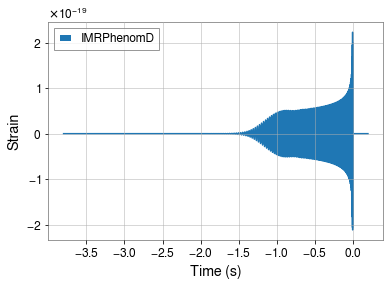

In [53]:
for apx in ['IMRPhenomD']:
    hp, hc = get_td_waveform(approximant=apx,
                                 mass1=10,
                                 mass2=10,
                                 spin1z=0.9,
                                 delta_t=1.0/4096,
                                 f_lower=40)

    plt.plot(hp.sample_times, hp, label=apx)

plt.ylabel('Strain')
plt.xlabel('Time (s)')
plt.legend()
plt.show()

[(1.35405851, 1.06378731)]


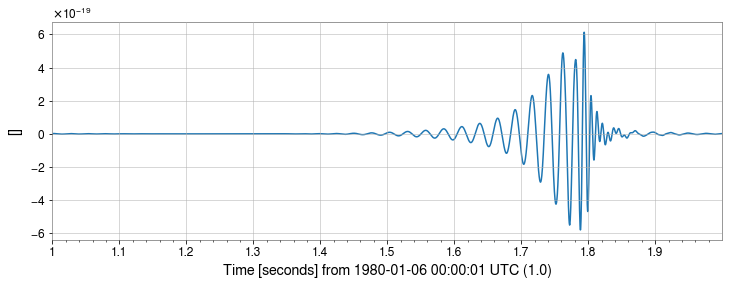

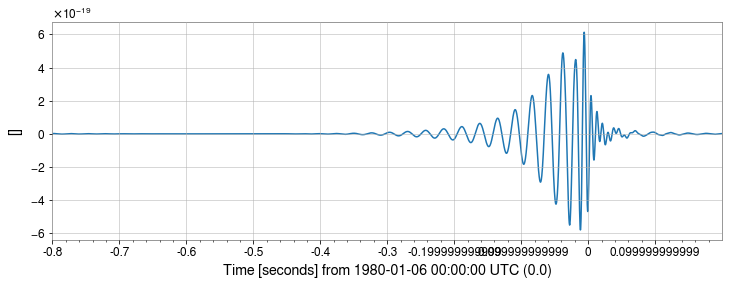

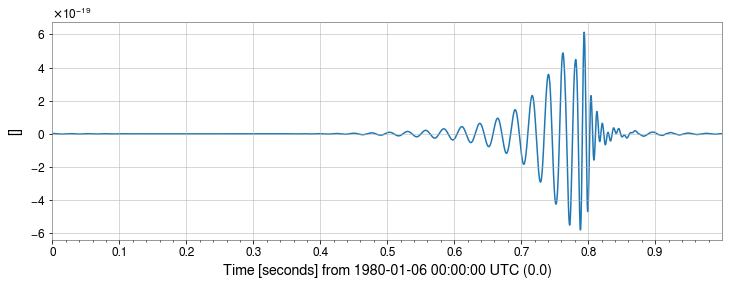

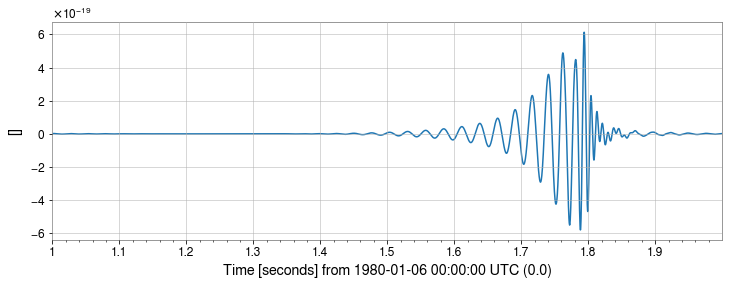

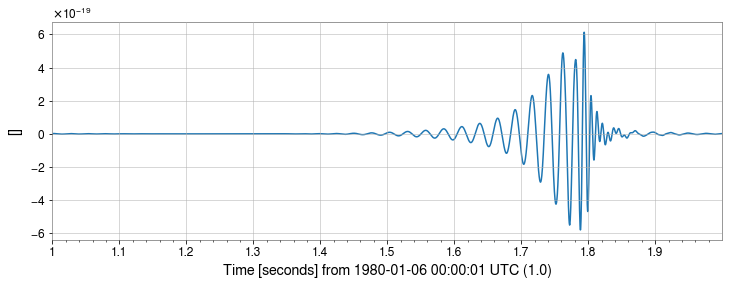

In [89]:
bns_two_mass_distributions = distributions.Uniform(mass1=(1, 2),
                                               mass2=(1, 2))

bns_two_mass_samples = bns_two_mass_distributions.rvs(size=1)
print(bns_two_mass_samples)

hp, hc = get_td_waveform(approximant='IMRPhenomPv2_NRTidal',
                                mass1=bbh_two_mass_samples[0][0],
                                mass2=bbh_two_mass_samples[0][1],
                                delta_t=1.0/4096,
                                f_lower=40)

# plt.plot(hp.sample_times, hp, label='IMRPhenomPv2_NRTidal')

# plt.ylabel('Strain')
# plt.xlabel('Time (s)')
# plt.legend()
# plt.show()

signal = TimeSeries.from_pycbc(hp)
signal.plot()

signal.t0 = 0

signal.plot()

signal.t0 = 1

signal.plot()

signal.t0 = 2

signal.plot()


[(45.1168656, 21.30937892)]


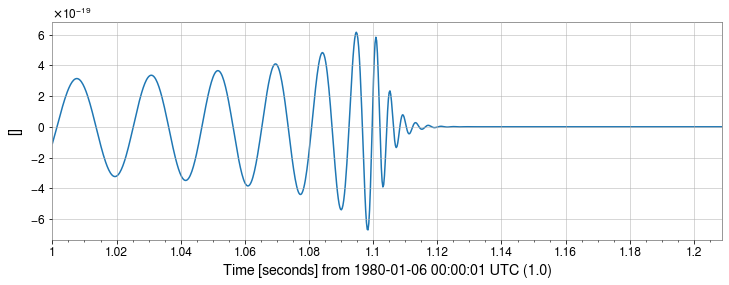

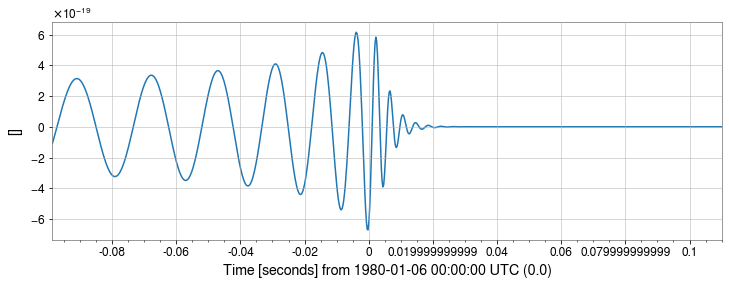

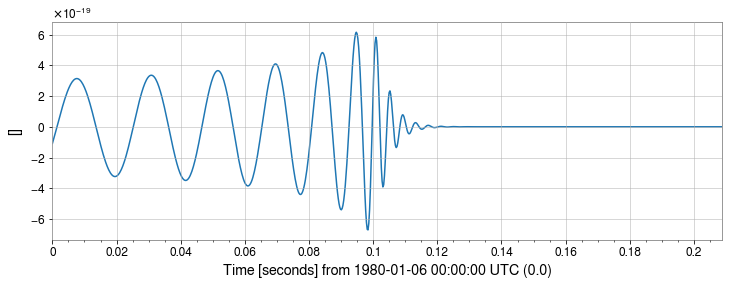

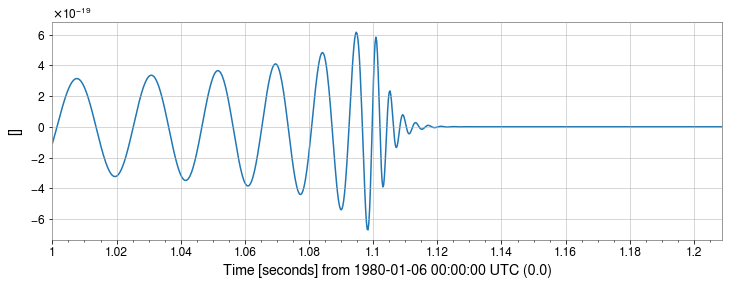

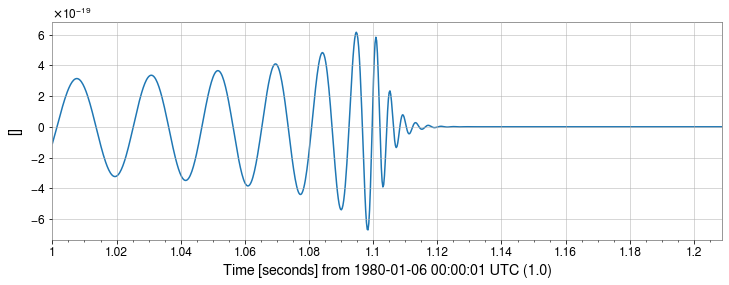

In [90]:
bbh_two_mass_distributions = distributions.Uniform(mass1=(10, 50),
                                               mass2=(10, 50))

bbh_two_mass_samples = bbh_two_mass_distributions.rvs(size=1)
print(bbh_two_mass_samples)

hp, hc = get_td_waveform(approximant='SEOBNRv2',
                                mass1=bbh_two_mass_samples[0][0],
                                mass2=bbh_two_mass_samples[0][1],
                                delta_t=1.0/4096,
                                f_lower=40)

# plt.plot(hp.sample_times, hp, label='SEOBNRv2')

# plt.ylabel('Strain')
# plt.xlabel('Time (s)')
# plt.legend()
# plt.show()

signal = TimeSeries.from_pycbc(hp)
signal.plot()

signal.t0 = 0

signal.plot()

signal.t0 = 1

signal.plot()

signal.t0 = 2

signal.plot()

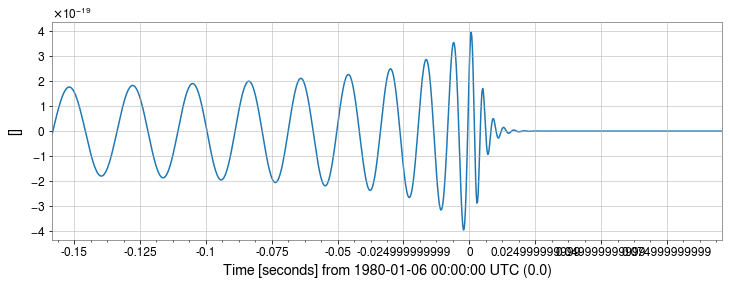

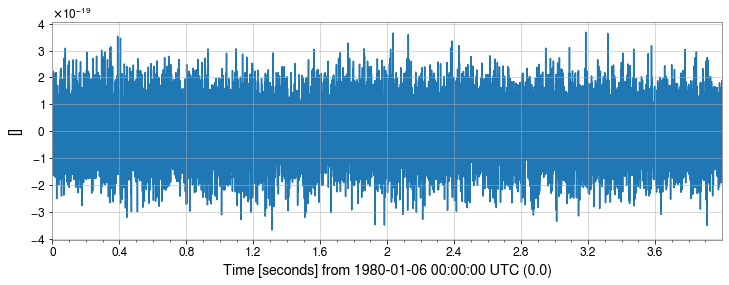

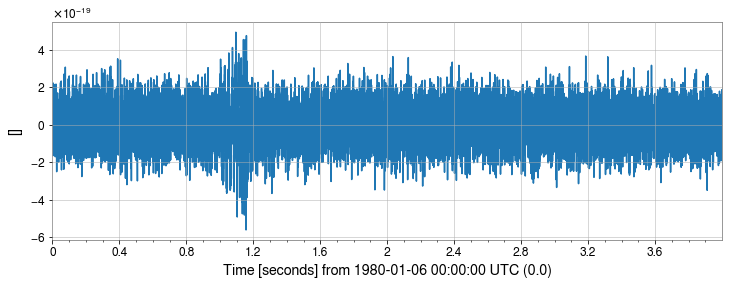

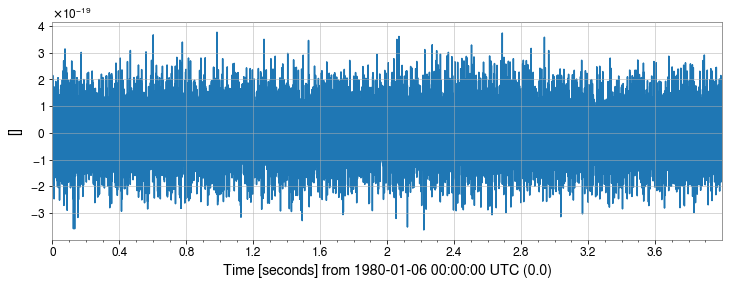

In [91]:
i = 4096

bbh = TimeSeries.read("/home/hrishi/SOP/Gravitational Wave Detection Using Deep Learning/raw_data_files/bbh_signal/bbh_4k_"+str(i)+".txt")
fig1 = bbh.plot()
# plt.plot(bbh, label='SEOBNRv2')

# plt.ylabel('Strain')
# plt.xlabel('Time (s)')
# plt.legend()
# plt.show()

noise = TimeSeries.read("/home/hrishi/SOP/Gravitational Wave Detection Using Deep Learning/raw_data_files/noise_templates/noise_4k_"+str(i)+".txt")
fig1 = noise.plot()

merged_bbh = TimeSeries.read("/home/hrishi/SOP/Gravitational Wave Detection Using Deep Learning/raw_data_files/merged_bbh_noise_signal/merged_noise_signal_"+str(i)+".txt")
fig1 = merged_bbh.plot()

merged_bns = TimeSeries.read("/home/hrishi/SOP/Gravitational Wave Detection Using Deep Learning/raw_data_files/merged_bns_noise_signal/bns_merged_noise_signal_"+str(0)+".txt")
fig1 = merged_bns.plot()

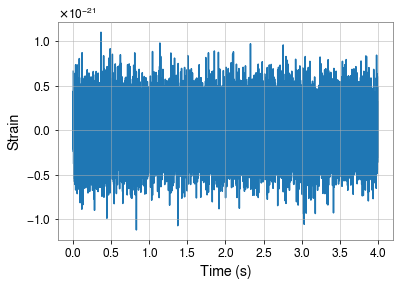

In [49]:
import pycbc.noise
import pycbc.psd


# The color of the noise matches a PSD which you provide
flow = 30.0
delta_f = 1.0 / 16
flen = int(2048 / delta_f) + 1
psd = pycbc.psd.aLIGOZeroDetHighPower(flen, delta_f, flow)

# Generate 4 seconds of noise at 4096 Hz
delta_t = 1.0 / 4096
tsamples = int(4 / delta_t)
ts = pycbc.noise.noise_from_psd(tsamples, delta_t, psd, seed=127)

plt.plot(ts.sample_times, ts)
plt.ylabel('Strain')
plt.xlabel('Time (s)')
plt.show()

In [ ]:
#### DATASET DEBUGGING END
##################################################################################################################################
##################################################################################################################################

In [ ]:
#f1.close()

In [2]:
print("Generated Binary Mass Distributions for BNS")
# We can make pairs of distributions together, instead of apart.
bns_two_mass_distributions = distributions.Uniform(mass1=(1, 2),
                                               mass2=(1, 2))

bns_two_mass_samples = bns_two_mass_distributions.rvs(size=5000)

Generated Binary Mass Distributions for BNS


In [3]:
from pycbc import frame
#import random
#from numpy import random
print("Using Binary Mass Distributions to generate BNS waveforms")
print("Generating BBH Waveforms, Noise and Merging them together and writing into disk, it may take few minutes...")
for i in tqdm(range(len(bns_two_mass_samples))):
    hp, hc = get_td_waveform(approximant="IMRPhenomPv2_NRTidal", 
                         mass1=bns_two_mass_samples[i][0],
                         mass2=bns_two_mass_samples[i][1],
                         delta_t=1.0/4096,
                         f_lower=40)            #change to 40   SEOBNRv2
    
    # noise = TimeSeries(np.random.normal(scale=.1, size=16384), sample_rate=4096)
    # noise = noise*1e-18

    noise = TimeSeries.read("/home/hrishi/SOP/Gravitational Wave Detection Using Deep Learning/raw_data_files/noise_templates/noise_4k_"+str(i)+".txt")
    
    st = np.random.randint(0,2)
    #st = round(st,0)
    #hp.save("bbh_template_4k/bbh_4k_"+str(i+1)+".txt")
    #frame.write_frame("bbh_template_4k/bbh_4k_"+str(i+1)+".gwf", , hp)
    #pylab.plot(hp.sample_times, hp, label='H1')
    #pylab.plot(noise)
    signal = TimeSeries.from_pycbc(hp)
    
    # signal.write("new_data_4s_reduced_noise_no_abs/bns_signal/bns_signal_4s_bns_4k_"+str(i)+".txt")
    #noise.write("4s_new_generated_data/4s_noise_template_4k/4s_noise_4k_"+str(i+1)+".txt")
    #print(st)
    
    signal.t0 = st
    data = noise.inject(signal)
    #pylab.plot(data)
    data.write("/home/hrishi/SOP/Gravitational Wave Detection Using Deep Learning/raw_data_files/merged_bns_noise_signal/bns_merged_noise_signal_"+str(i)+".txt")

#pylab.ylabel('Strain')
#pylab.xlabel('Time (s)')
#pylab.legend()
#pylab.show()

Using Binary Mass Distributions to generate BNS waveforms
Generating BBH Waveforms, Noise and Merging them together and writing into disk, it may take few minutes...


  0%|          | 0/5000 [00:00<?, ?it/s]

In [4]:
# MERGING NOISE + SIgnal Templates into single file


#for i in tqdm(range(5)):
path = "/home/hrishi/SOP/Gravitational Wave Detection Using Deep Learning/raw_data_files/merged_bns_noise_signal/"
files= os.listdir(path)
f = open('/home/hrishi/SOP/Gravitational Wave Detection Using Deep Learning/raw_data_files/Final_BNS_Merged_Noise_Signal_Reduced_No_ABS.csv', 'w')
cw = csv.writer(f)

for i in tqdm(files):
    df = pd.read_csv(path+i,sep = ' ', header=None)
    c = df[:][1]
    cw.writerow(c)
f.close()

  0%|          | 0/5000 [00:00<?, ?it/s]

In [ ]:
##################################################################################################################################
##################################################################################################################################

In [ ]:

path_n = "4s_new_generated_data/4s_noise_template_4k/"


path_s = "4s_new_generated_data/4s_bns_template_4k/"

for i in tqdm(range(3)):
    s = TimeSeries.read(path_s+"4s_bns_4k_"+str(i+1)+".txt")
    n = TimeSeries.read(path_n+"4s_noise_4k_"+str(i+1)+".txt")
    st = np.random.randint(0,2)
    s.t0 = st
    data = n.inject(s)
    pylab.plot(n)
    pylab.plot(s)
        
    data.write("4s_new_generated_data/4s_merged_bns_noise_signal/4s_merged_noise_signal_"+str(i+1)+".txt")
pylab.show()

In [ ]:
#hp_bns, hc_bns = get_td_waveform(approximant="IMRPhenomPv2_NRTidal",
 #                        mass1=bns_two_mass_samples[3][0],
 #                        mass2=bns_two_mass_samples[3][1],
 #                        delta_t=1.0/4096,
 #                        f_lower=200)
#s = TimeSeries.read(path_s+"4s_bns_4k_"+str(1)+".txt")
n = TimeSeries.read(path_n+"4s_noise_4k_"+str(1)+".txt")
#pylab.plot(hp_bns.sample_times, hp_bns)
n= n*(1e-19)
pylab.scatter(n, range(16384))
pylab.show()

In [ ]:
hp_bns, hc_bns = get_td_waveform(approximant="IMRPhenomPv2_NRTidal",
                  mass1=2,
                   mass2=1.5,
                     delta_t=1.0/4096,
                      f_lower=40)
pylab.scatter(hp_bns.sample_times,hp_bns)

In [ ]:
s = TimeSeries.from_pycbc(hp_bns)
#pylab.plot(s)



In [ ]:
d = n.inject(s)
pylab.plot(d)

In [ ]:
pylab.scatter(d,range(16384))
#pylab.scatter(n*1e-18,range(16384))

In [ ]:
df = {}

files= "4s_new_generated_data/5000_4s_merged_bbh_noise_signal_no_abs/"
#data = [] # pd.concat takes a list of dataframes as an agrument
for i in range(5):
    #x=[]
    
    #print(csv)
    frame = pd.read_csv(files+"5000_4s_merged_noise_signal_3501"+str(i+1)+".txt",sep = ' ', header=None)
    
    #print(frame)
    #file_name = os.path.basename(csv)
    #print(file_name)
    #data.append(frame[:][1])
    x  = list(frame[:][1])
    #print(x)
    df['signal_noise_template_'+str(i+1)] = x
#print(df)

df1 = pd.DataFrame(dict([ (k,pd.Series(v)) for k,v in df.items() ]))
print(df1)
#df1_transposed = df1.T
#print(df1_transposed)
df1.to_csv("4s_new_generated_data/sample_signal_noise.csv", index=None)

In [ ]:
df = {}

files= "4s_new_generated_data/5000_4s_noise_template_4k_no_abs/"
#data = [] # pd.concat takes a list of dataframes as an agrument
for i in range(5):
    #x=[]
    
    #print(csv)
    frame = pd.read_csv(files+"5000_4s_noise_4k_350"+str(i+1)+".txt",sep = ' ', header=None)
    
    #print(frame)
    #file_name = os.path.basename(csv)
    #print(file_name)
    #data.append(frame[:][1])
    x  = list(frame[:][1])
    #print(x)
    df['pure_noise_template_'+str(i+1)] = x
#print(df)

df1 = pd.DataFrame(dict([ (k,pd.Series(v)) for k,v in df.items() ]))
print(df1)
#df1= df1*1e-17
print(df1)
#df1_transposed = df1.T
#print(df1_transposed)
df1.to_csv("4s_new_generated_data/sample_pure_noise.csv", index=None)

In [ ]:
df = {}

files= "4s_new_generated_data/5000_4s_bbh_template_4k_no_abs/"
#data = [] # pd.concat takes a list of dataframes as an agrument
for i in range(5):
    #x=[]
    
    #print(csv)
    frame = pd.read_csv(files+"5000_4s_bbh_4k_350"+str(i+1)+".txt",sep = ' ', header=None)
    
    #print(frame)
    #file_name = os.path.basename(csv)
    #print(file_name)
    #data.append(frame[:][1])
    x  = list(frame[:][1])
    #print(x)
    df['only_signal_template_'+str(i+1)] = x
#print(df)

df1 = pd.DataFrame(dict([ (k,pd.Series(v)) for k,v in df.items() ]))
print(df1)

#df1_transposed = df1.T
#print(df1_transposed)
df1.to_csv("4s_new_generated_data/sample_signal.csv", index=None)

In [ ]:
df = pd.read_csv("4s_new_generated_data/sample_pure_noise.csv", header=None)
print(df.shape)

In [ ]:
#print(df)
df = df.iloc[0: , :]
print(df[0])

plt.plot(df[0])
plt.show()

In [ ]:
df = pd.read_csv("4s_new_generated_data/5000_4s_bbh_template_4k_no_abs/5000_4s_bbh_4k_3501.txt",sep=' ', header=None)
print(df)
